# Dream of Data
## Airline Satisfaction - Phase 3 Report
**Team members**

Shan Chen, Hector Cadeaux, Szufan (Saki) Chen, Hanqing (Zack) Chen, Kunyu (Ruth) Cheung

****
## Changes made compared with Phase 2
**1. Business problem analysis in the begining of the notebook**

**2. Models used and result evaluation in Phase 2 Summary**

**3. Phase 3 Parameter Optimization and Stacked Ensemble**

• H2O - Gradient Boosted Machines <br/>
• Grid search for Parameter tuning using XgBoost<br/>
• Stacked Ensemble for RF and GBM <br/>
• Auto ML Leadboard

**4. Conclusion and Business Suggestion**

# Analysis of Business Problem 

The airlines were in a great place in 2018. Revenue was soaring in North America to the tune of $38.4 billion. Cargo operators projected that 62.5 million tons would be hauled that same year (Reid, Scoop Profits, 2018). Of course, those were different times. 2019 did not prove to be easy as airline bankruptcies were rampant, and Boeing’s 737 MAX was grounded (O’Hare, 2019). The novel coronavirus has made things more difficult for the airline industry.  According to the International Air Transport Association (IATA), airlines operated with a net loss of \$118 billion in 2020. Instead of paying taxes, the airlines received aid of \$173 billion (IATA,2020). 

The airlines also saw other systemic problems. Congestion in the air, terrorism, rising oil prices, politics, and labor relations hang over their heads (Zhang,2018). It is a challenging market, and navigating it proves more complex daily. For many airlines, the main objective is to keep customers happy. With shrinking margins and diminished room between seats, this seems antithetical, but it is an important goal. The airlines need to do something to get customers back in the air.

The Kaggle data set uses real-world airline data and masks it under the name of a fictional company, Invistico. The challenge is to find a way to find a correlation between 23 variables and the satisfaction of its customers. The hope is to create more satisfied customers who will return for more trips. It tasks us with finding a nugget of wisdom that will make for happier customers that are more willing to fly with Invistico.


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np

# Creating visualizations.
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

# K-means
from sklearn.cluster import KMeans

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Model
!pip install dmba
from sklearn.model_selection import train_test_split#, cross_val_score, GridSearchCV
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from dmba  import liftChart, gainsChart

from sklearn.linear_model import LogisticRegression # , LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Accuracy calculation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score #, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import make_scorer


     |████████████████████████████████| 11.8MB 2.0MB/s 
no display found. Using non-interactive Agg backend


# Import Airline data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Scarlett-cs/cis9660/main/Invistico_Airline.csv')
df.info()
# null value in 'Arrival Delay in Minutes'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

## Missing values in 'Arrival Delay in Minutes'. 

In [ ]:
print(129880-129487,'missing values in "Arrival Delay in Minutes".')

393 missing values in "Arrival Delay in Minutes".


## Fill missing values

In [ ]:
# Fill null values of 'Arrival Delay in Minutes' with value from corresponding row of 'Departure Delay in Minutes'
df['Arrival Delay in Minutes'].fillna(df['Departure Delay in Minutes'], inplace = True)

# Exploratory Data

After data cleaning, here's what we've found. Out of 130 thousand surveys conducted that have 23 different variables, with roughly 55% satisfaction rate, the average age of customer is 39.5, and average flight distance is 2000 miles. There are slightly more female customers than male customers; A little over 80% of customers are loyal; Roughly 70% of customers are business travellers; Class is split almost evenly between business and economy class, with economy plus contributes to 7.24% of total. For bar graphs that show customer ratings for different types of services, with a maximum score of 5, cleanliness receives the highest average rating score of all (3.7), while seat comfort has the lowest average rating (2.83).

In [ ]:
df_columns = df.columns.tolist()
numerical_variables = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
categorical_variables = [i for i in df_columns if i not in (numerical_variables + ['satisfaction'])]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [ ]:
# categorical attributes visualization
fig,ax = plt.subplots(9, 2, figsize=(10,55))

for i, variable in enumerate(categorical_variables):
    plt.subplot(9,2,i+1)
    sns.countplot(df[variable])

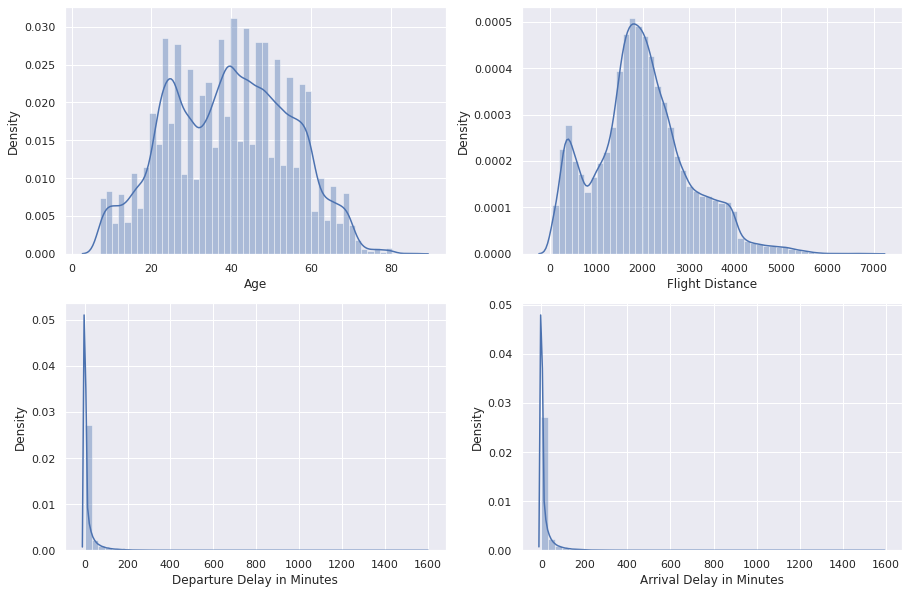

In [ ]:
# Numerical attributes visualization
fig,ax = plt.subplots(2, 2, figsize=(15,10))

for i, variable in enumerate(numerical_variables):
    plt.subplot(2,2,i+1)
    sns.distplot(df[variable])

## Dummy

In [ ]:
df_corr = df

In [ ]:
# Create dummies
df = pd.get_dummies(df, columns = ['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class'], drop_first = True)

In [ ]:
# Create dummies - corr
df_dummies = pd.get_dummies(df_corr[['Gender','Customer Type','Type of Travel','Class']])
df_corr = pd.concat([df_corr, df_dummies], axis=1)

In [ ]:
df_corr['satisfaction'] = df_corr['satisfaction'].replace(['satisfied'],1)
df_corr['satisfaction'] = df_corr['satisfaction'].replace(['dissatisfied'],0)

## Frequency of target variable 'satisfaction'

In [ ]:
#target variable frequency
print('Satisfied frequency:',df['satisfaction_satisfied'].sum()/129880)

Satisfied frequency: 0.5473283030489683


## Correlation matrix

The heat map represents the correlation between our numeric variables and target variable 'Satisfaction.' The top 3 variables that have the highest correlation to 'Satisfaction' are: 'Inflight entertainment' (0.52), 'Ease of online booking' (0.43), and 'Online support' (0.39).

In [ ]:
corr = df_corr[['satisfaction',
       'Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Female', 'Gender_Male', 'Customer Type_Loyal Customer',
       'Customer Type_disloyal Customer', 'Type of Travel_Business travel',
       'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus']].corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu")
plt.show()

# Scatterplots

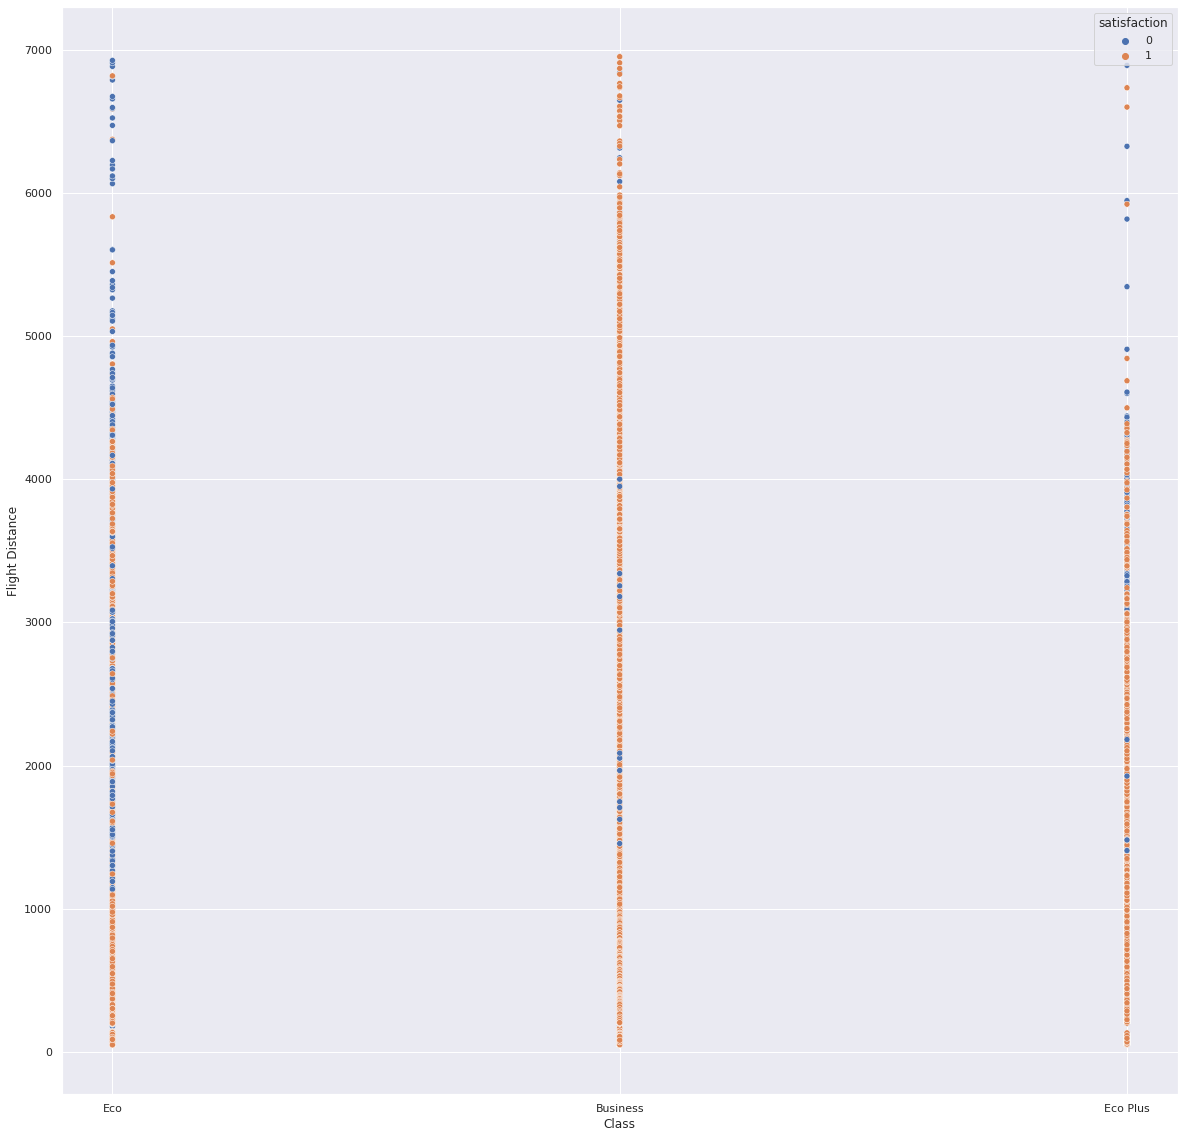

In [ ]:
plt.figure(figsize=(20, 20))
sns.scatterplot(data =df_corr, x= 'Class', y = 'Flight Distance', hue = 'satisfaction')

The above scatterplot shows the correlation between flight class and flight distance to the overall satisfaction, and it shows some interesting insights.
For Economy class, most customers are satisfied when the flight is shorter than 1000 miles. When the distance is above 1000 miles, satisfaction rate is mixed. Especially when flight distance are longer than 4000 miles, most customers are dissatisfied.Business and Economy Plus class has an overwhelmingly positive satisfaction rate across all lengths of flight distance.

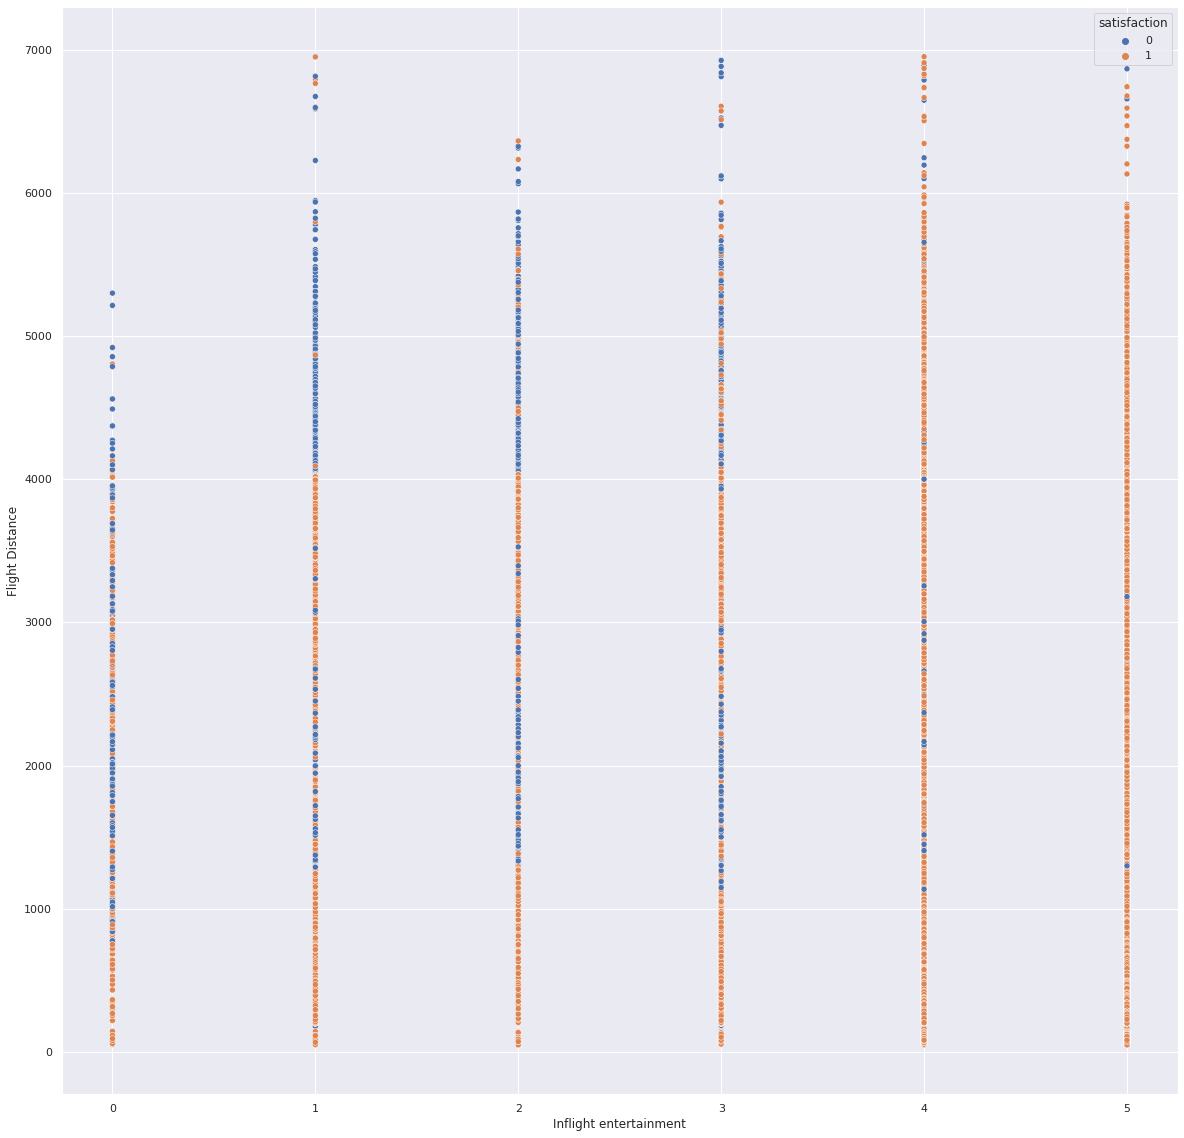

In [ ]:
plt.figure(figsize=(20, 20))
sns.scatterplot(data =df_corr, x= 'Inflight entertainment', y = 'Flight Distance', hue = 'satisfaction')

This above scatterplot shows correlation between inflight entertainment rating and flight distance to the overall satisfaction.
For flights that have flight distance shorter than 1000 miles, inflight entertainment rating doesn't affect satisfaction much. For flights that are  longer than 1000 miles, low inflight entertainment rating will often lead to dissatisfied customers,
especially for flights that are longer than 4000 miles. 
High inflight entertainment rating (4 or 5) will lead to satisfied customer across all flight ranges.

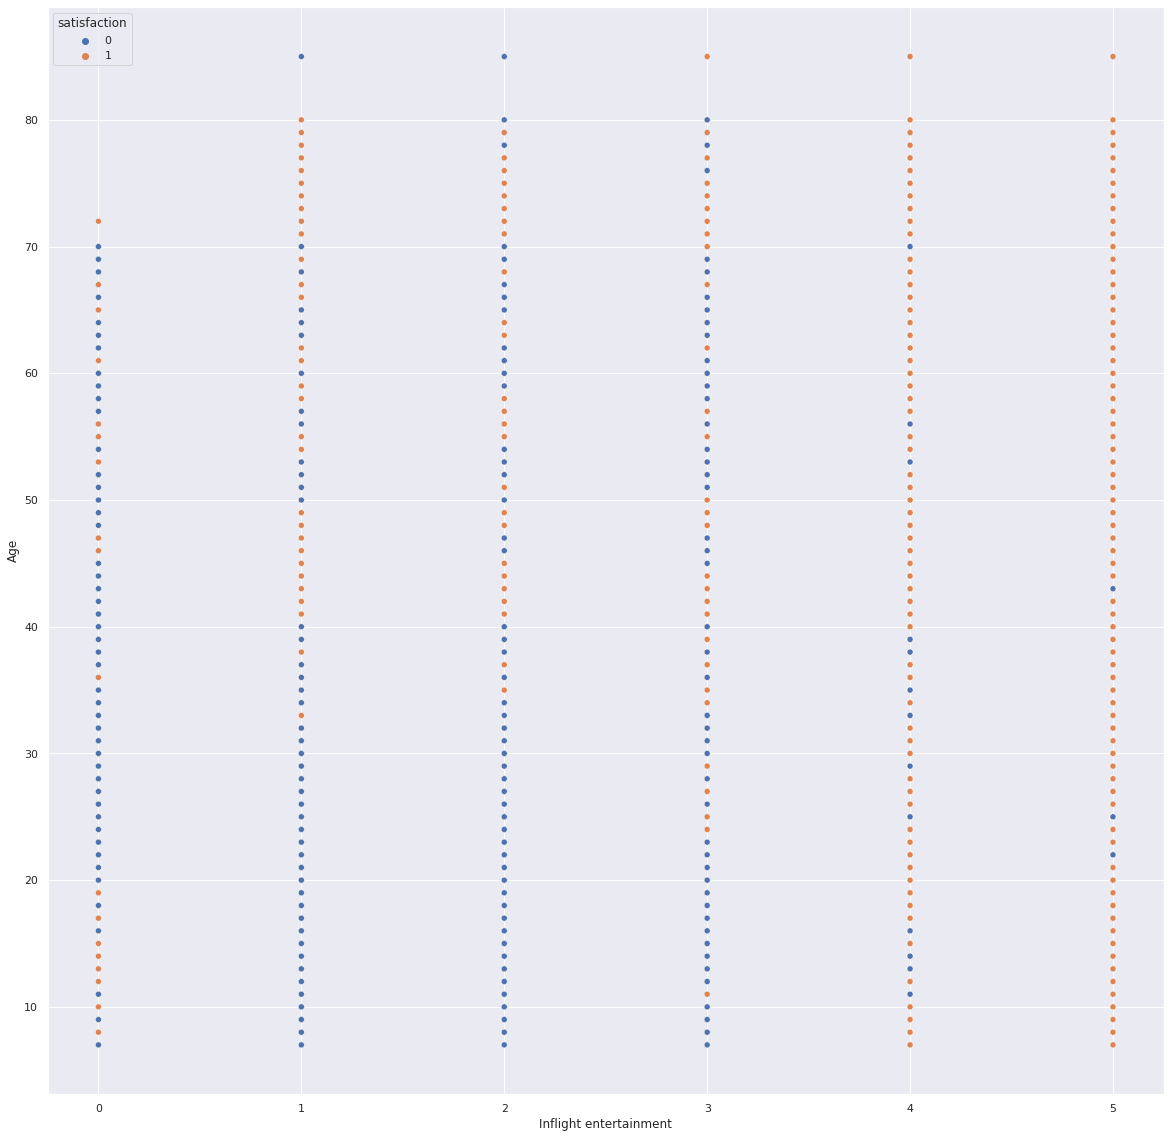

In [ ]:
plt.figure(figsize=(20, 20))
sns.scatterplot(data =df_corr, x= 'Inflight entertainment', y = 'Age', hue = 'satisfaction')

Above scatterplot shows that inflight entertainment is especially important to customers that are younger than 40 year old, but there's less of a satisfaction factor for customers that are older than 40 year old.

## Outliers
Investigate in the outliers for 2 attributes that are most correlated with 'satisfaction'. 

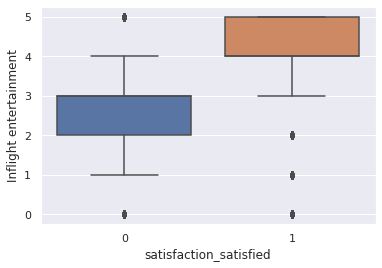

In [ ]:
#Outliers for 'Inflight entertainment'
sns.boxplot(data = df, x = 'satisfaction_satisfied', y = 'Inflight entertainment')
plt.show()

In [ ]:
df['Inflight entertainment'].value_counts()

4    41879
5    29831
3    24200
2    19183
1    11809
0     2978
Name: Inflight entertainment, dtype: int64

In [ ]:
19183 +11809 +2978

33970

Most passengers are satisfied when the inflight entertainment has level 4 or level 5. 

33970 outliers out of 129880 records of satisfied under inflight entertainment of level 0,1, and 2.  

Because the attribute has values of 0,1,2,3,4,5. The number of outliers seems to be large. But the most values for satisfaction fall in 4 and 5 so the box plot shows a lot of outliers. We decided not to modify the outliers. 

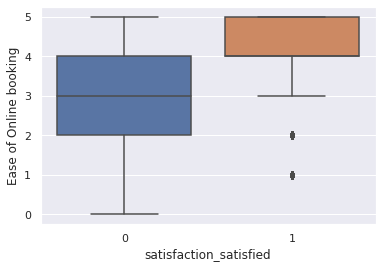

In [ ]:
#Outliers for 'Ease of Online booking'
sns.boxplot(data = df, x = 'satisfaction_satisfied', y = 'Ease of Online booking')
plt.show()

In [ ]:
df['Ease of Online booking'].value_counts()

4    39920
5    34137
3    22418
2    19951
1    13436
0       18
Name: Ease of Online booking, dtype: int64

In [ ]:
19951+13436+18

33405

Most passengers are satisfied when the online booking is easy (level 4 and 5).

33405 outliers out of 129880 records of satisfied with ease of online booking is or below level 2.

We didn't drop outliers because of the same reason mentioned above. 

# Feature engineering 
K-means cluster and PCA 

In [ ]:
# Train, test split
outcome= ['satisfaction_satisfied']
predictors= [x for x in df.columns if x not in outcome ]

X= df[predictors]
y = df[outcome]

trainX, validX, trainy, validy = train_test_split(X, y, test_size=0.3, random_state=1)


## K-means cluster
Create 3 clusters for 5 attributes ('Flight Distance', 'Departure/Arrival time convenient', 'Gate location', 'Departure Delay in Minutes', 'Class_Eco Plus')

We selected these five variables because they all have 0.1 correlation with our target variable 'satisfaction' based on the correlation matrix. We want to create clusters for the variables that are  relatively less relevant to the target variable and try to increase the relevance and, thus, model performance by using clustering results.

In [ ]:
# Select columns for clustering
x_kmeans3 = df[['Flight Distance', 'Departure/Arrival time convenient', 'Gate location', 'Departure Delay in Minutes', 'Class_Eco Plus']].values
kmeans3 = KMeans(n_clusters=3)

# fit kmeans model and assign clusters
y_kmeans3 = kmeans3.fit_predict(x_kmeans3)

# copy the df and exclude 5 attributes used in clustering
df_cluster = df[['Age', 'Seat comfort',
      'Food and drink', 
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Arrival Delay in Minutes',
       'satisfaction_satisfied', 'Gender_Male',
       'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel',
       'Class_Eco']]

# add new column 'kmeans3', save new df as 'df_cluster'
df_cluster['kmeans3']= y_kmeans3

# count values for each cluster
df_cluster['kmeans3'].value_counts()

0    72178
2    32750
1    24952
Name: kmeans3, dtype: int64

The result of clusters changes everytime when the code gets re-run.

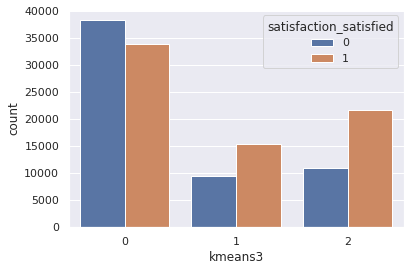

In [ ]:
#count the satisfaction results for each cluster
sns.countplot(df_cluster['kmeans3'], hue = df_cluster['satisfaction_satisfied'])

### Split df_cluster to train and test

In [ ]:
#specify predictors and outcome
outcome = ['satisfaction_satisfied']
predictors_kmeans = [x for x in df_cluster.columns if x not in outcome ]

In [ ]:
# features
X_cluster = df_cluster.loc[:, predictors_kmeans]
X_cluster = pd.get_dummies(X_cluster, drop_first = True)

# target
y_cluster = df_cluster[outcome]

# split df_cluster to train and test
from sklearn.model_selection import train_test_split
trainX_cluster, validX_cluster, trainy_cluster, validy_cluster = train_test_split(X_cluster, y_cluster, test_size=0.3, random_state=1)

## PCA

The first principal component contains 17.48% of the variance and the second principal component contains 11.1% of the variance.<br>

We can see that over 80% of the variance is captured within the 11 largest principal components.<br>
Therefore, it is acceptable to choose the first 11 largest principal components to make up the projection matrix.<br>

The principal components are linear combinations of the original (typically correlated) variables, and a subset of them serve as new variables to replace the numerous original variables.

In [ ]:
# Standardize the feature matrix, fit on training set
scaler = StandardScaler()
scaler.fit(trainX)

# Apply transform to both the training set and the validation set.
trainX_transform = scaler.transform(trainX)
validX_transform = scaler.transform(validX)

In [ ]:
# Conduct principal component analysis

# Create a PCA that will retain 80% of the variance
pca = PCA(n_components = 0.8) 

# Fit PCA
pca.fit(trainX_transform)

trainX_pca = pca.transform(trainX_transform)
validX_pca = pca.transform(validX_transform)

In [ ]:
# View Results
print('Original number of features:', trainX_transform.shape[1])
print('Reduced number of features:', trainX_pca.shape[1])

Original number of features: 23
Reduced number of features: 11


In [ ]:
print(pca.explained_variance_ratio_)

[0.1748203  0.11104962 0.09400193 0.08653212 0.07061213 0.06351129
 0.05207628 0.04688483 0.0438715  0.03849151 0.0348127 ]


# Modeling

After performing the feature engineering, it was essential to test how well the models would perform. Logistic Regression, Naïve Bayes, and Random Forest were used in model implementation. Logistic Regression was chosen due to its simplicity and adaptability to non-normal data (GeeksforGeeks, 2020). Naïve Bayes was selected due to its performance with categorical data and performance compared to Logistic Regression (Ray, 2017).

Last, Dream of Data decided to use a random forest classifier over a decision tree. Random forests are robust because they run multiple decision trees using a subset of features chosen at random. The trees are bootstrapped and bagged, leading to a vote which decides where our datapoint resides. Random Forests are great with high dimension data, strong with non-linear data, unbalanced data, and outliers, and have low bias and moderate variance (Kho, 2018).


## Logistic Regression 

In [ ]:
def Logistic_Regression(train_X, valid_X, train_y, valid_y):
    logit_reg = LogisticRegression(penalty="l2", solver='liblinear')
    logit_reg.fit(train_X, train_y)
    
    # predict probabilities
    pred_prob_lr = logit_reg.predict_proba(valid_X)    
    
    # prediction
    prediction_train_lr = logit_reg.predict(train_X)
    prediction_valid_lr = logit_reg.predict(valid_X)
    
    # Model Accuracy, how often is the classifier correct?
    print("Train accuracy:", accuracy_score(trainy, prediction_train_lr))
    print("Test accuracy:", accuracy_score(validy, prediction_valid_lr))
    
    # precision, recall, and f-measure
    print("precision score: ", precision_score(validy, prediction_valid_lr))
    print("recall score: ", recall_score(validy, prediction_valid_lr))
    print("f1-score: ", f1_score(validy, prediction_valid_lr))
       
    # Feature importances
    if train_X is trainX:
        print('intercept ', logit_reg.intercept_[0])
        print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).sort_values('coeff', ascending = False))

    # Confution matrix for validation set
    cm = confusion_matrix(valid_y, prediction_valid_lr)
    sns.heatmap(cm, annot=True, fmt='g', cbar=False)
    plt.xlabel("Prediction")
    plt.ylabel("Actual")
    plt.show()
    
    return(pred_prob_lr, prediction_valid_lr)
    

In [ ]:
# Logistic Regression - Baseline
print("Logistic Regression - Baseline\n")
pred_prob_lr, prediction_valid_lr = Logistic_Regression(trainX, validX, trainy, validy)

# Logistic Regression - K-means
print("Logistic Regression - K-means\n")
_= Logistic_Regression(trainX_cluster, validX_cluster, trainy_cluster, validy_cluster)

# Logistic Regression - PCA
print("Logistic Regression - PCA\n")
_= Logistic_Regression(trainX_pca, validX_pca, trainy, validy)


Logistic Regression - Baseline

Train accuracy: 0.8352985173126842
Test accuracy: 0.8360024638127502
precision score:  0.8477508650519031
recall score:  0.8526147479307751
f1-score:  0.8501758499413835
intercept  -4.730945443004033
                                      coeff
Inflight entertainment             0.676853
On-board service                   0.304996
Checkin service                    0.297528
Seat comfort                       0.291391
Ease of Online booking             0.231558
Leg room service                   0.219457
Online boarding                    0.162717
Gate location                      0.108960
Baggage handling                   0.103128
Online support                     0.094468
Cleanliness                        0.081315
Departure Delay in Minutes         0.003473
Flight Distance                   -0.000117
Age                               -0.008023
Arrival Delay in Minutes          -0.008632
Inflight wifi service             -0.073246
Departure/Arrival ti

## Naive Bayes

In [ ]:
def Naive_Bayes(train_X, valid_X, train_y, valid_y):
    nb = GaussianNB()
    nb.fit(train_X, train_y)

    # predict probabilities
    pred_prob_nb = nb.predict_proba(valid_X)
    
    # prediction
    prediction_train_nb = nb.predict(train_X)
    prediction_valid_nb = nb.predict(valid_X)

    # Model Accuracy, how often is the classifier correct?
    print("Train accuracy:", accuracy_score(train_y, prediction_train_nb))
    print("Test accuracy:", accuracy_score(valid_y, prediction_valid_nb))

    # precision, recall, and f-measure
    print("precision score: ", precision_score(valid_y, prediction_valid_nb))
    print("recall score: ", recall_score(valid_y, prediction_valid_nb))
    print("f1-score: ", f1_score(valid_y, prediction_valid_nb))

    # Feature importances
    if train_X is trainX:
        NB_varimportance_0 = pd.DataFrame({'attribute': train_X.columns, 'importance': nb.theta_[0]})
        NB_varimportance_0 = NB_varimportance_0.sort_values('importance', ascending = False)
        print(NB_varimportance_0)

    # Confution matrix for validation set
    cm = confusion_matrix(valid_y, prediction_valid_nb)
    sns.heatmap(cm, annot=True, fmt='g', cbar=False)
    plt.xlabel("Prediction")
    plt.ylabel("Actual")
    plt.show()
    
    return(pred_prob_nb, prediction_valid_nb)
    

In [ ]:
# Naive Bayes - Baseline
print("Naive Bayes - Baseline\n")
pred_prob_nb, prediction_valid_nb = Naive_Bayes(trainX, validX, trainy, validy)

# Naive Bayes - K-means
print("Naive Bayes - K-means\n")
_ = Naive_Bayes(trainX_cluster, validX_cluster, trainy_cluster, validy_cluster)

# Naive Bayes - PCA
print("Naive Bayes - PCA\n")
_ = Naive_Bayes(trainX_pca, validX_pca, trainy, validy)


Naive Bayes - Baseline

Train accuracy: 0.81615997184214
Test accuracy: 0.8176778564829073
precision score:  0.8284468361477083
recall score:  0.8398231753197893
f1-score:  0.8340962167211583
                            attribute   importance
1                     Flight Distance  2027.082350
0                                 Age    37.473073
17           Arrival Delay in Minutes    18.627357
16         Departure Delay in Minutes    17.853114
14                        Cleanliness     3.380113
12                   Baggage handling     3.364685
11                   Leg room service     3.051444
3   Departure/Arrival time convenient     3.017375
5                       Gate location     3.005962
13                    Checkin service     2.970920
10                   On-board service     2.970725
8                      Online support     2.963376
6               Inflight wifi service     2.924610
15                    Online boarding     2.873458
9              Ease of Online booking     2

## Random Forest

In [ ]:
def Random_Forest(train_X, valid_X, train_y, valid_y):
    rfc = RandomForestClassifier(random_state=1)
    rfc.fit(train_X, train_y)
    
    # predict probabilities
    pred_prob_rf = rfc.predict_proba(valid_X)
    
    # prediction
    prediction_train_rfc = rfc.predict(train_X)
    prediction_valid_rfc = rfc.predict(valid_X)

    # Model Accuracy, how often is the classifier correct?
    print("Train accuracy:", accuracy_score(train_y, prediction_train_rfc))
    print("Test accuracy:", accuracy_score(valid_y, prediction_valid_rfc))

    # precision, recall, and f-measure
    print("precision score: ", precision_score(valid_y, prediction_valid_rfc))
    print("recall score: ", recall_score(valid_y, prediction_valid_rfc))
    print("f1-score: ", f1_score(valid_y, prediction_valid_rfc))

    # Feature importances
    if train_X is trainX:
        importances = rfc.feature_importances_
        rfc_imp = pd.DataFrame({'feature': train_X.columns, 'importance': importances})
        rfc_imp = rfc_imp.sort_values('importance', ascending = False)
        print(rfc_imp)

    # Confution matrix for validation set
    cm = confusion_matrix(valid_y, prediction_valid_rfc)
    sns.heatmap(cm, annot=True, fmt='g', cbar=False)
    plt.xlabel("Prediction")
    plt.ylabel("Actual")
    plt.show()
    
    return(pred_prob_rf, prediction_valid_rfc)
    

In [ ]:
# Random Forest - Baseline
print("Random Forest - Baseline\n")
pred_prob_rf, prediction_valid_rfc = Random_Forest(trainX, validX, trainy, validy)

# Random Forest - K-means
print("Random Forest - K-means\n")
_ = Random_Forest(trainX_cluster, validX_cluster, trainy_cluster, validy_cluster)

# Random Forest - PCA
print("Random Forest - PCA\n")
_ = Random_Forest(trainX_pca, validX_pca, trainy, validy)


Random Forest - Baseline

Train accuracy: 1.0
Test accuracy: 0.9572939123293296
precision score:  0.9691689008042895
recall score:  0.9520316027088036
f1-score:  0.9605238185613968
                              feature  importance
7              Inflight entertainment    0.199490
2                        Seat comfort    0.123125
8                      Online support    0.072656
9              Ease of Online booking    0.064499
11                   Leg room service    0.043587
19    Customer Type_disloyal Customer    0.043405
10                   On-board service    0.043197
4                      Food and drink    0.040468
15                    Online boarding    0.037673
1                     Flight Distance    0.036705
18                        Gender_Male    0.032394
0                                 Age    0.031874
20     Type of Travel_Personal Travel    0.031429
12                   Baggage handling    0.027851
14                        Cleanliness    0.026562
13                 

# Phase 2 Summary 

In phase 2, we have accomplished the baseline model buidling and fit the models with three sets of data (original, k-means cluster, pca) utilizing feature engineering. And accuracy, precision, recall and f-1 results of them are provided for further comparison and model evaluations.





## F-1 is chosen for model evaluation.

When running our models, it became important to find a metric to make an apples-to-apples comparison of our results. The team looked at accuracy, precision, recall, and f-1. Accuracy is the most direct metric, measuring the ratio of correctly identified data points with respect to the total data. The precision measures the percentage of the true positives to the positives (true and false); the recall measures the true positive to the total positives (true positives and false negatives). The f-1 statistic is the harmonic mean of the precision and recall. It presents a picture of the data without the true negatives coming into play. Our team decided that the f-1 statistic would be the best metric to evaluate the performance of our models because the inclusion of the true negatives skews the metrics and gives a better picture of the satisfied customers.

The table below outlines the results of running our models. Random forest saw the best results; the score was .1 higher than the other two models. Surprisingly, with exception to Naïve Bayes, the baseline models performed better than PCA and K-means. Additionally, Naïve Bayes performed well but lagged behind the other two models. Finally, for Naïve Bayes, the PCA model showed minor improvement compared to the baseline. It appears that the extra 12 attributes just added a minimal amount of noise to the overall model, albeit minimal. As we advance, the analysis will focus on the baseline models.
 
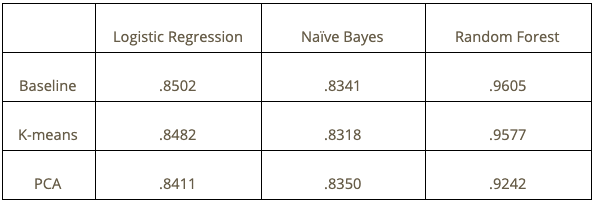



## Statistics results of PCA and K-means

We compromise the accuracy by projecting the data onto lower dimensional space. The accuracy, precision, recall and f-1 results get worse after conducting PCA and K-means cluster as we lose information when we lower the dimensions representing the data. The attributes we selected may not represent the original data precisely / accurately. So we get better model accuracy results using the original dataset.

# Evaluating Performance - ROC curve and Cumulative Gains Chart

We include ROC curve and Cumulative Gains Chart to illustrate performance of the models we have built so far.

The ROC curve shows the trade-off between sensitivity and specificity. 

## ROC curve - Baseline

In [ ]:
# Creating ROC curves
fpr_lr,tpr_lr, thresh_lr= roc_curve(validy, pred_prob_lr[:,1], pos_label=1)
fpr_nb,tpr_nb, thresh_nb= roc_curve(validy, pred_prob_nb[:,1], pos_label=1)
fpr_rf,tpr_rf, thresh_rf= roc_curve(validy, pred_prob_rf[:,1], pos_label=1)

random_probs = [0 for i in range(len(validy))]
p_fpr, p_tpr, _ = roc_curve(validy, random_probs, pos_label=1)

roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_nb = auc(fpr_nb, tpr_nb)
roc_auc_rf= auc(fpr_rf, tpr_rf)

plt.figure(figsize=[10, 10])
plt.plot(fpr_lr, tpr_lr, linestyle='--',color='blue', label='Logistic Regression (area = %0.4f)' % roc_auc_lr)
plt.plot(fpr_nb, tpr_nb, linestyle='--',color='green', label='Naive Bayes(area = %0.4f)' % roc_auc_nb)
plt.plot(fpr_rf, tpr_rf, linestyle='-',color='red', label='Random Forest (area = %0.4f)' % roc_auc_rf)

plt.plot(p_fpr, p_tpr, linestyle='--',color='black')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc='best')
plt.show()

The AUC values for all of our three models are close to 1, which denotes an excellent classifier.

## Cumulative Gains Chart - Baseline

The cumulative gains chart shows the percentage of the overall number of cases in a given category "gained" by targeting a percentage of the total number of cases.

In [ ]:
def liftChart(predicted, title='Decile Lift Chart', labelBars=True, ax=None, figsize=None):
    # group the sorted predictions into 10 roughly equal groups and calculate the mean
    groups = [int(10 * i / len(predicted)) for i in range(len(predicted))]
    meanPercentile = predicted.groupby(groups).mean()

    # divide by the mean prediction to get the mean response
    meanResponse = meanPercentile / predicted.mean()
    meanResponse.index = (meanResponse.index + 1) * 10
    ax = meanResponse.plot.bar(color='C0', ax=ax, figsize=figsize)
    ax.set_ylim(0, 1.12 * meanResponse.max() if labelBars else None)
    ax.set_xlabel('Percentile')
    ax.set_ylabel('Lift')
    if title:
        ax.set_title(title)
    if labelBars:
        for p in ax.patches:
            ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height() + 0.1))
    return ax

def gainsChart(gains, color=None, label=None, ax=None, figsize=None):
    nTotal = len(gains)  # number of records
    nActual = gains.sum()  # number of desired records
    # get cumulative sum of gains and convert to percentage
    cumGains = pd.concat([pd.Series([0]), gains.cumsum()])  # Note the additional 0 at the front
    gains_df = pd.DataFrame({'records': list(range(len(gains) + 1)), 'cumGains': cumGains})
    ax = gains_df.plot(x='records', y='cumGains', color=color, label=label, legend=False, ax=ax, figsize=figsize)
    # Add line for random gain
    ax.plot([0, nTotal], [0, nActual], linestyle='--', color='k')
    ax.set_xlabel('# records')
    ax.set_ylabel('# cumulative gains')
    return ax

In [ ]:
pred_v_lr = pd.Series(prediction_valid_lr).sort_values(ascending=False)
pred_v_nb = pd.Series(prediction_valid_nb).sort_values(ascending=False)
pred_v_rf = pd.Series(prediction_valid_rfc).sort_values(ascending=False)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,15))
plt.rcParams['figure.figsize']=30,30
ax = gainsChart(pred_v_lr, ax=axes[0][0],color='blue',label='Logistic Regression')
ax = gainsChart(pred_v_nb, ax=axes[0][0],color='green',label='Naive Bayes')
ax = gainsChart(pred_v_rf, ax=axes[0][0],color='red',label='Random Forest')

#ax.set_ylabel('Cumulative Price')
ax.set_title('Cumulative Gains Chart')
ax.legend()

ax = liftChart(pred_v_lr, ax=axes[0][1], labelBars=False)
ax.set_ylabel('Lift')
ax.set_title("Logisitic Regression Lift Chair")

ax = liftChart(pred_v_nb, ax=axes[1][1], labelBars=False )
ax.set_ylabel('Lift')
ax.set_title("Naive Bayes Lift Chair")

ax = liftChart(pred_v_rf, ax=axes[1][0], labelBars=False )
ax.set_ylabel('Lift')
ax.set_title("Random Forest Lift Chair")

plt.tight_layout()
plt.show()

Compared with logistic regression and random forest model, we notice that Naive Bayes has the best performance in terms of providing cumulative gains. 

# Phase 3 Parameter Optimization and Stacked Ensemble

### Hyperparameter tuning - Random Forest

In [ ]:
# Hyperparameter tuning - Random Forest
# parameter grid
rf_params1 = {'n_estimators': [100, 200],
              'max_depth': [50, 100],
              'min_samples_split' : [30]}

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'recall': make_scorer(recall_score, average = 'macro'),
           'f1': make_scorer(f1_score, average = 'macro')}

# GridSearchCV for hyperparameter tuning.
cv = KFold(n_splits=5)
classifier = RandomForestClassifier()
grid_search = GridSearchCV(estimator=classifier, param_grid=rf_params1, scoring=scoring, cv=cv, verbose=5, n_jobs=-1, refit='f1')
grid_search.fit(trainX, trainy.values.ravel())

print("Best Parameters Found: ", grid_search.best_params_)
print("Best Score Found: ", np.sqrt(np.abs(grid_search.best_score_)))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  4.0min finished


Best Parameters Found:  {'max_depth': 100, 'min_samples_split': 30, 'n_estimators': 200}
Best Score Found:  0.9747918193431732


In [ ]:
# Fit random forest model with best parameter set (max_depth = 100, min_samples_split = 30, n_estimators = 200)
rfc = RandomForestClassifier(max_depth = 100, n_estimators = 200, min_samples_split=30, random_state=1)
rfc.fit(trainX, trainy)

# predict probabilities
pred_prob_rf = rfc.predict_proba(validX)

# prediction
prediction_train_rfc = rfc.predict(trainX)
prediction_valid_rfc = rfc.predict(validX)

fpr_rf,tpr_rf, thresh_rf= roc_curve(validy, pred_prob_rf[:,1], pos_label=1)
roc_auc_rf= auc(fpr_rf, tpr_rf)

# Model Accuracy, how often is the classifier correct?
print("Train accuracy:", accuracy_score(trainy, prediction_train_rfc))
print("Test accuracy:", accuracy_score(validy, prediction_valid_rfc))

# precision, recall, and f-measure
print("precision score: ", precision_score(validy, prediction_valid_rfc))
print("recall score: ", recall_score(validy, prediction_valid_rfc))
print("f1-score: ", f1_score(validy, prediction_valid_rfc))
print("AUC: ", roc_auc_rf)

Train accuracy: 0.9690703506533503
Test accuracy: 0.954650446566061
precision score:  0.9644133199942833
recall score:  0.9520316027088036
f1-score:  0.9581824636137736
AUC:  0.9919438174065713


The best parameter set for random forest is max_depth = 100, min_samples_split = 30, n_estimators = 200.<br>
The AUC is 0.9919.

# Gradient Boosted Machines with Cross-Validation

In [ ]:
#pip install http://h2o-release.s3.amazonaws.com/h2o/rel-zipf/2/Python/h2o-3.32.1.2-py2.py3-none-any.whl

In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmplqkmmnpv
  JVM stdout: /tmp/tmplqkmmnpv/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmplqkmmnpv/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.2
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_fzyog2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.174 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [ ]:
h2o = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
h2o.head()

Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_satisfied,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0,1,0,0,1,1,0
47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305,1,1,0,1,0,0
15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0,1,0,0,1,1,0
60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0,1,0,0,1,1,0
70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0,1,0,0,1,1,0
30,1894,0,0,0,3,2,0,2,2,5,4,5,5,4,2,0,0,1,1,0,1,1,0
66,227,0,0,0,3,2,5,5,5,5,0,5,5,5,3,17,15,1,0,0,1,1,0
10,1812,0,0,0,3,2,0,2,2,3,3,4,5,4,2,0,0,1,1,0,1,1,0
56,73,0,0,0,3,5,3,5,4,4,0,1,5,4,4,0,0,1,0,0,1,0,0
22,1556,0,0,0,3,2,0,2,2,2,4,5,3,4,2,30,26,1,1,0,1,1,0


In [ ]:
h2o['satisfaction_satisfied'] = h2o['satisfaction_satisfied'].asfactor()
target = 'satisfaction_satisfied'
predictors = h2o.columns
y=target
predictors.remove(y)

In [ ]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

# Train a GBM model setting nfolds to 5
gbm = H2OGradientBoostingEstimator(nfolds = 10, seed = 1)
gbm.train(x=predictors, y=target, training_frame=h2o)

# AUC of cross-validated holdout predictions
gbm.auc(xval=True)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


0.9862481845262268

GBM has AUC of cross-validated predictions of 0.9862, which is a relatively high result. But the AUC of random forest before using GBM is 0.9928. So  GBM doesn't increase the model performance in terms of AUC.

In [ ]:
#Get f1 score for gbm
gbm.F1()

[[0.48015925078457283, 0.943733153638814]]

Maximum f1 value for gbm is 0.9437. 

In [ ]:
gbm.varimp

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1621101662368_1


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,22387.0,5.0,5.0,5.0,25.0,32.0,30.96




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.04561068907657746
RMSE: 0.2135665916677453
LogLoss: 0.16301580596171097
Mean Per-Class Error: 0.06155848566810651
AUC: 0.9865266204238818
AUCPR: 0.9898398862929481
Gini: 0.9730532408477637

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.48015925078457283: 


,,0,1,Error,Rate
0,0,54640.0,4153.0,0.0706,(4153.0/58793.0)
1,1,3863.0,67224.0,0.0543,(3863.0/71087.0)
2,Total,58503.0,71377.0,0.0617,(8016.0/129880.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.480159,0.943733,210.0
1,max f2,0.223127,0.957039,286.0
2,max f0point5,0.743454,0.959014,131.0
3,max accuracy,0.494765,0.938397,206.0
4,max precision,0.995948,1.000000,0.0
5,max recall,0.022028,1.000000,393.0
6,max specificity,0.995948,1.000000,0.0
7,max absolute_mcc,0.494765,0.875705,206.0
8,max min_per_class_accuracy,0.519637,0.938118,199.0
9,max mean_per_class_accuracy,0.536359,0.938442,194.0



Gains/Lift Table: Avg response rate: 54.73 %, avg score: 54.72 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010002,0.992234,1.827057,1.827057,1.000000,0.993541,1.000000,0.993541,0.018273,0.018273,82.705699,82.705699,0.018273
1,2,0.020049,0.990746,1.825657,1.826355,0.999234,0.991422,0.999616,0.992479,0.018344,0.036617,82.565694,82.635535,0.036600
2,3,0.030813,0.989996,1.827057,1.826600,1.000000,0.990439,0.999750,0.991767,0.019666,0.056283,82.705699,82.660045,0.056266
3,4,0.042047,0.989380,1.827057,1.826722,1.000000,0.989687,0.999817,0.991211,0.020524,0.076807,82.705699,82.672242,0.076790
4,5,0.051116,0.989074,1.827057,1.826782,1.000000,0.989175,0.999849,0.990850,0.016571,0.093379,82.705699,82.678179,0.093362
5,6,0.100008,0.987094,1.826769,1.826776,0.999843,0.988133,0.999846,0.989521,0.089313,0.182692,82.676926,82.677566,0.182658
6,7,0.150000,0.983794,1.827057,1.826869,1.000000,0.985604,0.999897,0.988216,0.091339,0.274030,82.705699,82.686942,0.273996
7,8,0.200100,0.980429,1.826776,1.826846,0.999846,0.982284,0.999885,0.986730,0.091522,0.365552,82.677620,82.684608,0.365501
8,9,0.302325,0.968308,1.826782,1.826824,0.999849,0.974903,0.999873,0.982731,0.186743,0.552295,82.678177,82.682434,0.552210
9,10,0.400000,0.927070,1.823600,1.826037,0.998108,0.953133,0.999442,0.975504,0.178120,0.730415,82.360047,82.603711,0.729922




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.04618100091474809
RMSE: 0.21489765218528584
LogLoss: 0.16394632959707978
Mean Per-Class Error: 0.062388324058874955
AUC: 0.9862481845262268
AUCPR: 0.9895755518116042
Gini: 0.9724963690524535

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5037732885723416: 


,,0,1,Error,Rate
0,0,54873.0,3920.0,0.0667,(3920.0/58793.0)
1,1,4236.0,66851.0,0.0596,(4236.0/71087.0)
2,Total,59109.0,70771.0,0.0628,(8156.0/129880.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.503773,0.942506,199.0
1,max f2,0.219757,0.956854,288.0
2,max f0point5,0.741426,0.958414,126.0
3,max accuracy,0.515526,0.937327,196.0
4,max precision,0.994983,1.000000,0.0
5,max recall,0.017589,1.000000,396.0
6,max specificity,0.994983,1.000000,0.0
7,max absolute_mcc,0.515526,0.873693,196.0
8,max min_per_class_accuracy,0.518141,0.937101,195.0
9,max mean_per_class_accuracy,0.542635,0.937612,188.0



Gains/Lift Table: Avg response rate: 54.73 %, avg score: 54.73 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010109,0.991928,1.825665,1.825665,0.999238,0.993062,0.999238,0.993062,0.018456,0.018456,82.566547,82.566547,0.018439
1,2,0.020003,0.991027,1.827057,1.826354,1.000000,0.991438,0.999615,0.992259,0.018076,0.036533,82.705699,82.635373,0.036516
2,3,0.030128,0.990271,1.827057,1.826590,1.000000,0.990600,0.999744,0.991702,0.018498,0.055031,82.705699,82.659007,0.055014
3,4,0.040060,0.989755,1.827057,1.826706,1.000000,0.990015,0.999808,0.991283,0.018147,0.073178,82.705699,82.670583,0.073161
4,5,0.050108,0.989325,1.827057,1.826776,1.000000,0.989541,0.999846,0.990934,0.018358,0.091536,82.705699,82.677625,0.091519
5,6,0.100046,0.987033,1.827057,1.826916,1.000000,0.988191,0.999923,0.989565,0.091240,0.182776,82.705699,82.691638,0.182759
6,7,0.150000,0.984102,1.826494,1.826776,0.999692,0.985617,0.999846,0.988250,0.091240,0.274016,82.649378,82.677564,0.273965
7,8,0.200008,0.980500,1.827057,1.826846,1.000000,0.982489,0.999885,0.986810,0.091367,0.365383,82.705699,82.684599,0.365332
8,9,0.300000,0.969463,1.826635,1.826776,0.999769,0.975417,0.999846,0.983012,0.182649,0.548033,82.663494,82.677564,0.547931
9,10,0.400000,0.928600,1.822274,1.825650,0.997382,0.953983,0.999230,0.975755,0.182227,0.730260,82.227411,82.565026,0.729580




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.9374505,0.0020309754,0.93440986,0.9367507,0.9389488,0.9375702,0.93957293
1,auc,0.98624897,6.3892355E-4,0.98539406,0.9859709,0.9867907,0.9861223,0.9869667
2,aucpr,0.98957074,5.390374E-4,0.98901933,0.98937166,0.9900175,0.9891875,0.99025786
3,err,0.062549494,0.0020309754,0.06559016,0.063249305,0.061051182,0.062429763,0.060427044
4,err_count,1624.8,53.941635,1706.0,1646.0,1596.0,1611.0,1565.0
5,f0point5,0.9443881,0.0029043725,0.9420555,0.94156075,0.9479609,0.94695395,0.94340944
6,f1,0.94268847,0.0018702017,0.9401109,0.94191957,0.94375134,0.9426016,0.9450588
7,f2,0.941007,0.0035929128,0.93817437,0.9422786,0.93957895,0.9382891,0.9467139
8,lift_top_group,1.8256584,0.008006148,1.8198992,1.8377234,1.8291352,1.8177899,1.8237448
9,logloss,0.16394553,0.002723825,0.1673893,0.16554382,0.16207552,0.16419454,0.16052444



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-05-15 18:02:19,1 min 4.911 sec,0.0,0.497755,0.688661,0.500000,0.547328,1.000000,0.452672
1,,2021-05-15 18:02:19,1 min 5.394 sec,1.0,0.466678,0.628079,0.941231,0.950508,1.827057,0.120403
2,,2021-05-15 18:02:19,1 min 5.632 sec,2.0,0.438974,0.576735,0.951508,0.962477,1.827057,0.112904
3,,2021-05-15 18:02:20,1 min 5.876 sec,3.0,0.415458,0.534644,0.955985,0.966096,1.827057,0.110109
4,,2021-05-15 18:02:20,1 min 6.191 sec,4.0,0.394713,0.498294,0.959468,0.967837,1.827057,0.106922
5,,2021-05-15 18:02:20,1 min 6.440 sec,5.0,0.377483,0.468330,0.959938,0.968444,1.827057,0.108654
6,,2021-05-15 18:02:21,1 min 6.787 sec,6.0,0.362253,0.442055,0.961164,0.970187,1.827057,0.106160
7,,2021-05-15 18:02:21,1 min 7.065 sec,7.0,0.348875,0.418587,0.963213,0.972261,1.827057,0.108377
8,,2021-05-15 18:02:21,1 min 7.357 sec,8.0,0.337647,0.398815,0.963601,0.972670,1.827057,0.107800
9,,2021-05-15 18:02:22,1 min 7.696 sec,9.0,0.327902,0.381296,0.963592,0.972830,1.827057,0.106837



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Inflight entertainment,66080.773438,1.000000,0.479379
1,Seat comfort,30584.781250,0.462839,0.221875
2,Ease of Online booking,8779.048828,0.132853,0.063687
3,Customer Type_disloyal Customer,3783.412842,0.057254,0.027447
4,Gender_Male,3628.143799,0.054905,0.026320
5,Type of Travel_Personal Travel,3053.047119,0.046202,0.022148
6,Online support,2705.061523,0.040936,0.019624
7,On-board service,2664.909424,0.040328,0.019332
8,Departure/Arrival time convenient,2630.542480,0.039808,0.019083
9,Checkin service,2597.307861,0.039305,0.018842



See the whole table with table.as_data_frame()


<bound method ModelBase.varimp of >

# Grid Parameter Search

Moving forward, we will use parameter optimization to improve the model performance.

## XgBoost

In [ ]:
from h2o.estimators import H2OXGBoostEstimator

#Split train and valid set:
train, valid = h2o.split_frame(ratios=[.7], seed=1)

# Build and train the model:
xgb = H2OXGBoostEstimator(booster='dart',
                                  normalize_type="tree",
                                  seed=1234)
xgb.train(x=predictors,
                  y=target,
                  training_frame=train,
                  validation_frame=valid)

# Eval performance:
perf = xgb.model_performance()

# Generate predictions on a test set (if necessary):
pred = xgb.predict(valid)

# Extract feature interactions:
feature_interactions = xgb.feature_interaction()

xgboost Model Build progress: |███████████████████████████████████████████| 100%
xgboost prediction progress: |████████████████████████████████████████████| 100%


In [ ]:
#Get f1 score for XgBoost
xgb.F1()

[[0.49295997282244125, 0.9644470436395902]]

We managed to increase f1 to 0.9644 with xgboost.

In [ ]:
xgb

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_model_python_1621101662368_117


Model Summary: 


,,number_of_trees
0,,50.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.027910357314909776
RMSE: 0.16706393181925827
LogLoss: 0.09487214875367833
Mean Per-Class Error: 0.03756376203324974
AUC: 0.9948426775241629
AUCPR: 0.9960636418814834
Gini: 0.9896853550483258

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.49295997282244125: 


,,0,1,Error,Rate
0,0,39634.0,1473.0,0.0358,(1473.0/41107.0)
1,1,2053.0,47825.0,0.0412,(2053.0/49878.0)
2,Total,41687.0,49298.0,0.0388,(3526.0/90985.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.492960,0.964447,187.0
1,max f2,0.223440,0.972319,273.0
2,max f0point5,0.730766,0.977691,120.0
3,max accuracy,0.551029,0.961367,170.0
4,max precision,0.999834,1.000000,0.0
5,max recall,0.002773,1.000000,394.0
6,max specificity,0.999834,1.000000,0.0
7,max absolute_mcc,0.551029,0.922619,170.0
8,max min_per_class_accuracy,0.474615,0.961045,192.0
9,max mean_per_class_accuracy,0.566329,0.962436,166.0



Gains/Lift Table: Avg response rate: 54.82 %, avg score: 54.82 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010002,0.999956,1.824151,1.824151,1.000000,0.999973,1.000000,0.999973,0.018245,0.018245,82.415093,82.415093,0.018245
1,2,0.020014,0.999940,1.824151,1.824151,1.000000,0.999948,1.000000,0.999961,0.018265,0.036509,82.415093,82.415093,0.036509
2,3,0.030137,0.999924,1.824151,1.824151,1.000000,0.999932,1.000000,0.999951,0.018465,0.054974,82.415093,82.415093,0.054974
3,4,0.040040,0.999908,1.824151,1.824151,1.000000,0.999917,1.000000,0.999942,0.018064,0.073038,82.415093,82.415093,0.073038
4,5,0.050030,0.999890,1.824151,1.824151,1.000000,0.999899,1.000000,0.999934,0.018224,0.091263,82.415093,82.415093,0.091263
5,6,0.100071,0.999780,1.824151,1.824151,1.000000,0.999837,1.000000,0.999885,0.091283,0.182545,82.415093,82.415093,0.182545
6,7,0.150036,0.999638,1.824151,1.824151,1.000000,0.999711,1.000000,0.999827,0.091142,0.273688,82.415093,82.415093,0.273688
7,8,0.200000,0.999422,1.824151,1.824151,1.000000,0.999540,1.000000,0.999755,0.091142,0.364830,82.415093,82.415093,0.364830
8,9,0.300005,0.998159,1.824151,1.824151,1.000000,0.998947,1.000000,0.999486,0.182425,0.547255,82.415093,82.415093,0.547255
9,10,0.400000,0.988705,1.824151,1.824151,1.000000,0.995350,1.000000,0.998452,0.182405,0.729660,82.415093,82.415093,0.729660




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.03271473731684771
RMSE: 0.18087215738429094
LogLoss: 0.10902247446736998
Mean Per-Class Error: 0.04526483082189192
AUC: 0.9926205865601906
AUCPR: 0.994319831314502
Gini: 0.9852411731203812

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4644156157970428: 


,,0,1,Error,Rate
0,0,16868.0,818.0,0.0463,(818.0/17686.0)
1,1,956.0,20253.0,0.0451,(956.0/21209.0)
2,Total,17824.0,21071.0,0.0456,(1774.0/38895.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.464416,0.958042,192.0
1,max f2,0.216015,0.966852,271.0
2,max f0point5,0.792938,0.973228,100.0
3,max accuracy,0.464416,0.954390,192.0
4,max precision,0.999855,1.000000,0.0
5,max recall,0.003266,1.000000,392.0
6,max specificity,0.999855,1.000000,0.0
7,max absolute_mcc,0.464416,0.908108,192.0
8,max min_per_class_accuracy,0.470188,0.954029,190.0
9,max mean_per_class_accuracy,0.514595,0.954735,178.0



Gains/Lift Table: Avg response rate: 54.53 %, avg score: 54.50 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010027,0.999957,1.833891,1.833891,1.000000,0.999973,1.000000,0.999973,0.018388,0.018388,83.389127,83.389127,0.018388
1,2,0.020080,0.999940,1.833891,1.833891,1.000000,0.999948,1.000000,0.999961,0.018436,0.036824,83.389127,83.389127,0.036824
2,3,0.030004,0.999923,1.833891,1.833891,1.000000,0.999931,1.000000,0.999951,0.018200,0.055024,83.389127,83.389127,0.055024
3,4,0.040005,0.999906,1.833891,1.833891,1.000000,0.999914,1.000000,0.999942,0.018341,0.073365,83.389127,83.389127,0.073365
4,5,0.050006,0.999888,1.833891,1.833891,1.000000,0.999897,1.000000,0.999933,0.018341,0.091706,83.389127,83.389127,0.091706
5,6,0.100039,0.999773,1.833891,1.833891,1.000000,0.999834,1.000000,0.999883,0.091754,0.183460,83.389127,83.389127,0.183460
6,7,0.150045,0.999628,1.833891,1.833891,1.000000,0.999704,1.000000,0.999824,0.091706,0.275166,83.389127,83.389127,0.275166
7,8,0.200000,0.999406,1.833891,1.833891,1.000000,0.999529,1.000000,0.999750,0.091612,0.366778,83.389127,83.389127,0.366778
8,9,0.300013,0.998115,1.832948,1.833577,0.999486,0.998912,0.999829,0.999471,0.183318,0.550097,83.294840,83.357695,0.549984
9,10,0.400000,0.987552,1.833891,1.833656,1.000000,0.995043,0.999871,0.998364,0.183366,0.733462,83.389127,83.365552,0.733349




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-05-15 18:02:34,0.180 sec,0.0,0.500000,0.693147,0.500000,0.548200,1.000000,0.451800,0.500000,0.693147,0.500000,0.545289,1.000000,0.454711
1,,2021-05-15 18:02:35,1.192 sec,1.0,0.406861,0.520413,0.953280,0.960919,1.824151,0.110974,0.407293,0.521137,0.951796,0.959321,1.833891,0.112379
2,,2021-05-15 18:02:35,1.777 sec,2.0,0.348897,0.420677,0.962764,0.970419,1.823241,0.096543,0.349648,0.421826,0.961040,0.968573,1.833891,0.096439
3,,2021-05-15 18:02:36,2.256 sec,3.0,0.308736,0.351455,0.970452,0.976971,1.824151,0.087993,0.309796,0.352955,0.969139,0.975445,1.830358,0.088932
4,,2021-05-15 18:02:36,2.748 sec,4.0,0.283290,0.304729,0.974044,0.980354,1.824151,0.081783,0.284955,0.306984,0.972461,0.978603,1.830729,0.082710
5,,2021-05-15 18:02:37,3.158 sec,5.0,0.266367,0.271814,0.975636,0.981626,1.824151,0.082640,0.268296,0.274472,0.973948,0.979906,1.829363,0.084201
6,,2021-05-15 18:02:37,3.627 sec,6.0,0.250457,0.241312,0.979944,0.984776,1.824151,0.075540,0.253129,0.244854,0.978268,0.983009,1.826153,0.077439
7,,2021-05-15 18:02:38,4.191 sec,7.0,0.239711,0.219180,0.982248,0.986491,1.824151,0.073100,0.242852,0.223219,0.980508,0.984816,1.824790,0.075382
8,,2021-05-15 18:02:42,8.263 sec,30.0,0.182833,0.114164,0.992636,0.994433,1.824151,0.046612,0.191103,0.123492,0.990884,0.993080,1.833891,0.050341
9,,2021-05-15 18:02:47,13.027 sec,46.0,0.169292,0.097411,0.994555,0.995853,1.824151,0.039655,0.182036,0.110587,0.992447,0.994228,1.833891,0.045816



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Inflight entertainment,81955.945312,1.000000,0.390621
1,Seat comfort,45101.996094,0.550320,0.214967
2,Ease of Online booking,12058.259766,0.147131,0.057472
3,Customer Type_disloyal Customer,7453.099121,0.090940,0.035523
4,Type of Travel_Personal Travel,7293.916016,0.088998,0.034764
5,Gender_Male,6081.808105,0.074208,0.028987
6,Departure/Arrival time convenient,5519.134277,0.067343,0.026305
7,On-board service,4747.678223,0.057930,0.022629
8,Cleanliness,4207.510254,0.051339,0.020054
9,Checkin service,4165.045410,0.050821,0.019852



See the whole table with table.as_data_frame()


## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgbst

cv = KFold(n_splits=5)

# GBM hyperparameters
gbm_params1 = {'learn_rate': [0.01, 0.1],
                'max_depth': [3, 5, 9],
                'ntrees': [100,200,300]}

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'recall': make_scorer(recall_score, average = 'macro'),
           'f1': make_scorer(f1_score, average = 'macro')}    

# GridSearchCV for hyperparameter tuning.
classifier = xgbst.XGBClassifier()
grid_search = GridSearchCV(estimator=classifier, param_grid=gbm_params1, scoring=scoring, cv=cv, verbose=5, n_jobs=-1, refit='f1')
grid_search.fit(trainX, trainy.values.ravel())

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 14.8min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',...
             iid='deprecated', n_jobs=-1,
             param_grid={'learn_rate': [0.01, 0.1], 'max_depth': [3, 5, 9],
                         'ntrees': [100, 200, 300]},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=False,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score, average=macro),
    

In [ ]:
print("Best Parameters Found: ", grid_search.best_params_)
print("Best Score Found: ", np.sqrt(np.abs(grid_search.best_score_)))

Best Parameters Found:  {'learn_rate': 0.01, 'max_depth': 9, 'ntrees': 100}
Best Score Found:  0.9780696465931298


The best parameters combination is when 'learn_rate' equals to 0.01, 'max_depth' is 9, and 'ntrees' gets 100. We managed to increase the f1 score to 0.9781, compared with 0.9605 when using baseline model of random forest.

In [ ]:
from h2o.grid.grid_search import H2OGridSearch

# Train and validate a cartesian grid of GBMs
gbm_grid = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid',
                          hyper_params=gbm_params1)
gbm_grid.train(x=predictors, y=target,
                training_frame=train,
                validation_frame=valid,
                seed=1)

# Get the grid results, sorted by validation AUC
gbm_gridperf = gbm_grid.get_grid(sort_by='auc', decreasing=True)
gbm_gridperf

# Grab the top GBM model, chosen by validation AUC
best_gbm = gbm_gridperf.models[0]

# Evaluate the model performance on a test set for estimate of top model performance
best_gbm_perf = best_gbm.model_performance(valid)

best_gbm_perf.auc()

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


0.9941386521323378

AUC of random forest before was 0.9928, and with grid search, we improved the AUC to 0.9941.

In [ ]:
best_gbm_perf.F1()

[[0.51741642628859, 0.9620487944071908]]

We got f1 of 0.9620 with grid search.

In [ ]:
best_gbm

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_grid_model_12


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,200.0,200.0,477472.0,0.0,9.0,5.355,1.0,427.0,185.43




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.013495139100976352
RMSE: 0.11616858052406577
LogLoss: 0.052158766585380184
Mean Per-Class Error: 0.01529738985388196
AUC: 0.999054561302883
AUCPR: 0.9992455659403103
Gini: 0.9981091226057659

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.44334561818446533: 


,,0,1,Error,Rate
0,0,40408.0,699.0,0.017,(699.0/41107.0)
1,1,714.0,49164.0,0.0143,(714.0/49878.0)
2,Total,41122.0,49863.0,0.0155,(1413.0/90985.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.443346,0.985833,200.0
1,max f2,0.330911,0.989212,235.0
2,max f0point5,0.608771,0.990045,156.0
3,max accuracy,0.482564,0.984503,190.0
4,max precision,0.999621,1.000000,0.0
5,max recall,0.024715,1.000000,366.0
6,max specificity,0.999621,1.000000,0.0
7,max absolute_mcc,0.482564,0.968757,190.0
8,max min_per_class_accuracy,0.458726,0.984402,196.0
9,max mean_per_class_accuracy,0.486452,0.984703,189.0



Gains/Lift Table: Avg response rate: 54.82 %, avg score: 54.82 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010002,0.999768,1.824151,1.824151,1.000000,0.999815,1.000000,0.999815,0.018245,0.018245,82.415093,82.415093,0.018245
1,2,0.020003,0.999723,1.824151,1.824151,1.000000,0.999743,1.000000,0.999779,0.018245,0.036489,82.415093,82.415093,0.036489
2,3,0.030005,0.999687,1.824151,1.824151,1.000000,0.999705,1.000000,0.999755,0.018245,0.054734,82.415093,82.415093,0.054734
3,4,0.040007,0.999657,1.824151,1.824151,1.000000,0.999672,1.000000,0.999734,0.018245,0.072978,82.415093,82.415093,0.072978
4,5,0.050008,0.999627,1.824151,1.824151,1.000000,0.999642,1.000000,0.999716,0.018245,0.091223,82.415093,82.415093,0.091223
5,6,0.100005,0.999482,1.824151,1.824151,1.000000,0.999556,1.000000,0.999636,0.091203,0.182425,82.415093,82.415093,0.182425
6,7,0.150003,0.999308,1.824151,1.824151,1.000000,0.999398,1.000000,0.999556,0.091203,0.273628,82.415093,82.415093,0.273628
7,8,0.200000,0.999091,1.824151,1.824151,1.000000,0.999205,1.000000,0.999468,0.091203,0.364830,82.415093,82.415093,0.364830
8,9,0.300005,0.998273,1.824151,1.824151,1.000000,0.998745,1.000000,0.999227,0.182425,0.547255,82.415093,82.415093,0.547255
9,10,0.400000,0.994299,1.824151,1.824151,1.000000,0.996982,1.000000,0.998666,0.182405,0.729660,82.415093,82.415093,0.729660




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.02930298311165211
RMSE: 0.17118114122663194
LogLoss: 0.09615302612813993
Mean Per-Class Error: 0.0398136123233388
AUC: 0.9941386521323378
AUCPR: 0.9954541034988292
Gini: 0.9882773042646755

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.51741642628859: 


,,0,1,Error,Rate
0,0,17070.0,616.0,0.0348,(616.0/17686.0)
1,1,980.0,20229.0,0.0462,(980.0/21209.0)
2,Total,18050.0,20845.0,0.041,(1596.0/38895.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.517416,0.962049,175.0
1,max f2,0.157862,0.970574,294.0
2,max f0point5,0.795209,0.976873,97.0
3,max accuracy,0.578417,0.959044,158.0
4,max precision,0.999673,1.000000,0.0
5,max recall,0.002473,1.000000,393.0
6,max specificity,0.999673,1.000000,0.0
7,max absolute_mcc,0.578417,0.918142,158.0
8,max min_per_class_accuracy,0.467675,0.957612,189.0
9,max mean_per_class_accuracy,0.578417,0.960186,158.0



Gains/Lift Table: Avg response rate: 54.53 %, avg score: 54.42 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010001,0.999771,1.833891,1.833891,1.000000,0.999814,1.000000,0.999814,0.018341,0.018341,83.389127,83.389127,0.018341
1,2,0.020003,0.999722,1.833891,1.833891,1.000000,0.999745,1.000000,0.999779,0.018341,0.036683,83.389127,83.389127,0.036683
2,3,0.030004,0.999685,1.833891,1.833891,1.000000,0.999704,1.000000,0.999754,0.018341,0.055024,83.389127,83.389127,0.055024
3,4,0.040005,0.999654,1.833891,1.833891,1.000000,0.999669,1.000000,0.999733,0.018341,0.073365,83.389127,83.389127,0.073365
4,5,0.050006,0.999624,1.833891,1.833891,1.000000,0.999638,1.000000,0.999714,0.018341,0.091706,83.389127,83.389127,0.091706
5,6,0.100013,0.999477,1.833891,1.833891,1.000000,0.999550,1.000000,0.999632,0.091706,0.183413,83.389127,83.389127,0.183413
6,7,0.150019,0.999298,1.833891,1.833891,1.000000,0.999391,1.000000,0.999552,0.091706,0.275119,83.389127,83.389127,0.275119
7,8,0.200000,0.999079,1.833891,1.833891,1.000000,0.999193,1.000000,0.999462,0.091659,0.366778,83.389127,83.389127,0.366778
8,9,0.300013,0.998207,1.833420,1.833734,0.999743,0.998722,0.999914,0.999215,0.183366,0.550144,83.341984,83.373411,0.550087
9,10,0.400000,0.993507,1.832477,1.833420,0.999229,0.996786,0.999743,0.998608,0.183224,0.733368,83.247660,83.341977,0.733142




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-05-15 18:34:06,4 min 54.165 sec,0.0,0.497671,0.688493,0.500000,0.548200,1.000000,0.451800,0.497953,0.689057,0.500000,0.545289,1.000000,0.454711
1,,2021-05-15 18:34:06,4 min 54.498 sec,1.0,0.458934,0.613568,0.981540,0.985434,1.824151,0.076551,0.459697,0.614984,0.977956,0.982475,1.832427,0.082710
2,,2021-05-15 18:34:07,4 min 54.822 sec,2.0,0.424710,0.551529,0.984851,0.988508,1.824151,0.070605,0.425915,0.553614,0.981486,0.985885,1.833891,0.076231
3,,2021-05-15 18:34:07,4 min 55.176 sec,3.0,0.394830,0.499862,0.985621,0.989049,1.824151,0.072649,0.396560,0.502667,0.982554,0.986566,1.833891,0.077439
4,,2021-05-15 18:34:07,4 min 55.576 sec,4.0,0.368693,0.456141,0.986061,0.989411,1.824151,0.066637,0.370935,0.459581,0.983018,0.986947,1.833891,0.071963
5,,2021-05-15 18:34:08,4 min 56.017 sec,5.0,0.346031,0.419059,0.986852,0.989976,1.824151,0.064549,0.348827,0.423128,0.983777,0.987568,1.833891,0.070266
6,,2021-05-15 18:34:08,4 min 56.448 sec,6.0,0.325373,0.385885,0.987746,0.990669,1.824151,0.061691,0.328676,0.390460,0.984774,0.988281,1.833891,0.067772
7,,2021-05-15 18:34:09,4 min 56.867 sec,7.0,0.306862,0.356464,0.988704,0.991434,1.824151,0.059317,0.310645,0.361469,0.985895,0.989199,1.833891,0.065253
8,,2021-05-15 18:34:09,4 min 57.265 sec,8.0,0.291339,0.331661,0.989178,0.991796,1.824151,0.057427,0.295652,0.337152,0.986367,0.989586,1.833891,0.064019
9,,2021-05-15 18:34:10,4 min 57.675 sec,9.0,0.277813,0.309800,0.989337,0.991946,1.824151,0.056372,0.282639,0.315736,0.986511,0.989694,1.833891,0.062424



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Inflight entertainment,46899.570312,1.000000,0.424318
1,Seat comfort,22594.218750,0.481757,0.204418
2,Ease of Online booking,7003.541992,0.149331,0.063364
3,Type of Travel_Personal Travel,3499.893555,0.074625,0.031665
4,Customer Type_disloyal Customer,3384.005859,0.072154,0.030616
5,Departure/Arrival time convenient,2577.413818,0.054956,0.023319
6,Gender_Male,2271.380615,0.048431,0.020550
7,Checkin service,2195.268066,0.046808,0.019861
8,Cleanliness,1997.079224,0.042582,0.018068
9,Online support,1995.880493,0.042556,0.018057



See the whole table with table.as_data_frame()


# Stacked Ensemble


In [ ]:
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator

# Generate a 2-model ensemble (GBM + RF)
## Train and cross-validate a GBM
my_gbm = H2OGradientBoostingEstimator(
                                      ntrees=100,
                                      max_depth=9,
                                      learn_rate=0.01,
                                      nfolds=3,
                                      fold_assignment="Modulo",
                                      keep_cross_validation_predictions=True,
                                      seed=1)
my_gbm.train(x=predictors, y=target, training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [ ]:
## Train and cross-validate a RF
my_rf = H2ORandomForestEstimator(ntrees=100,
                                 nfolds=3,
                                 fold_assignment="Modulo",
                                 keep_cross_validation_predictions=True,
                                 seed=1)
my_rf.train(x=predictors, y=target, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [ ]:
# Train a stacked ensemble using the GBM and GLM above
ensemble = H2OStackedEnsembleEstimator(model_id="my_ensemble_binomial",
                                       base_models=[my_gbm, my_rf])
ensemble.train(x=predictors, y=target, training_frame=train)

stackedensemble Model Build progress: |███████████████████████████████████| 100%


In [ ]:
# Eval ensemble performance on the test data
perf_stack_test = ensemble.model_performance(valid)
perf_stack_test.auc()

0.9925550484519196

2-model ensemble (GBM + RF) decreased the AUC compared with Baseline. 

In [ ]:
perf_stack_test.F1()

[[0.6124533524158835, 0.9597206276310754]]

F1 score is 0.9597 after stacked ensemble. 

# AutoML Leaderboard

In [ ]:
aml = H2OAutoML(max_models = 5, seed = 1)
aml.train(x = predictors, y = target, training_frame = h2o)
lb = aml.leaderboard

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [ ]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20210515_184342,0.994342,0.0938746,0.995675,0.0397388,0.169809,0.0288352
StackedEnsemble_BestOfFamily_AutoML_20210515_184342,0.994065,0.0962768,0.995488,0.0402886,0.171365,0.0293661
XGBoost_1_AutoML_20210515_184342,0.993583,0.100273,0.995104,0.0423357,0.175486,0.0307954
XGBoost_3_AutoML_20210515_184342,0.993427,0.101789,0.99499,0.0429528,0.176313,0.0310862
XGBoost_2_AutoML_20210515_184342,0.99338,0.102464,0.994938,0.0430016,0.17723,0.0314106
DRF_1_AutoML_20210515_184342,0.992869,0.117915,0.994691,0.0418137,0.181987,0.0331193
GLM_1_AutoML_20210515_184342,0.909154,0.385094,0.933408,0.168251,0.34479,0.11888


The table above shows the AUC values of all models built based on H2O. And the StackedEnsemble gives us the best result.

# Conclusion
## Factors that influence Satisfaction
After comparing the variable importance within the three models, we noticed that 'Inflight entertainment,' 'Seat comfort,' and 'Ease of Online booking' are always the top 3 most important variables. Other factors such as customer loyalty, gender, type of travel have approximately a 3% likelihood to influence customer satisfaction. To increase satisfaction, the company should focus on improving inflight entertainment, increasing seat comfort, and making it easier to book a ticket online. 



## Business Suggestions
1. For long flights, adding more inflight entertainment features for the economy class will likely improve overall satisfaction most effectively. Targeting the entertainment preferences of younger generations may prove advantageous. We recommend replacing obsolete shopping magazines and newspapers with fashion magazines and comic books and adding more popular movies and games to personal video screens to make long flights more tolerable.

2. The variable 'seat comfort' is also an essential factor for customer satisfaction. Increasing the seat comfort could lead to better rest for customers during a flight.  To further improve inflight rest, Invistico could improve seat selection for passengers looking to rest by emphasizing seats surrounded by fewer passengers or nearby infants. 

3. Currently, Invistico provides multiple pricing strategies and restrictions to the same flight seat. The flexibility decreases when customers book online; 'Ease of Online booking' is also an important factor for customer satisfaction. We recommend that the airline company target long-distance route customers based on the customer's personal data(age/ gender/ type of travel) to provide airfare recommendations. For example, young passengers are most likely price-sensitive and may not spend on the ticket change fee. Investico can recommend the cheaper but nonrefundable and unchangeable flight choices, thereby reducing the complexity of the passenger's choice. 

4.  We want to draw the attention to inflight services provided. Although it’s not included in our dataset, the survey report by American Customer Satisfaction Index shows the passenger satisfaction is at an all-time high for the airline industry during pandemic, because of less crowded flights mean better service. We recommend that Invistico keeps the friendly and in-time service to deliver high quality of inflight service.



### References
IATA. (2020, November). Economic Performance of the Airline Industry. https://www.iata.org/en/iata-repository/publications/economic-reports/airline-industry-economic-performance---november-2020---report/<br>
Kho, J. (2019, March 12). Why random forest is my favorite machine learning model. Medium. https://towardsdatascience.com/why-random-forest-is-my-favorite-machine-learning-model-b97651fa3706<br>
OEDC. (2020, October 15). COVID-19 and the aviation industry: Impact and policy responses. https://www.oecd.org/coronavirus/policy-responses/covid-19-and-the-aviation-industry-impact-and-policy-responses-26d521c1/<br>
O'Hare, M. (2019, December 23). The most talked-about aviation moments in 2019. https://www.cnn.com/travel/article/aviation-year-in-review-2019/index.html<br>
Popken, B. (2020, December 28). 2020 was brutal for airlines. Next year could be even trickier. https://www.nbcnews.com/business/business-news/2020-was-brutal-airlines-next-year-could-be-even-trickier-n1252436<br>
Reid, D. (2017, December 5). US airlines to scoop almost half of global profit in 2018. https://www.cnbc.com/2017/12/05/us-airlines-to-scoop-almost-half-of-global-profit-in-2018.html<br>
Reid, D. (2018, June 4). Airline profits to slump in 2018, industry body says. https://www.cnbc.com/2018/06/04/iata-forecasts-airline-profit-fall-in-2018.html<br>
Zhang, B. (2018, April 15). Airlines are making more money than ever — but they're facing a mountain of problems. Business Insider. https://www.businessinsider.com/airlines-biggest-business-problems-2018-4

Study: Airline passenger satisfaction hits record high during pandemic https://www.ajc.com/news/business/study-airline-passenger-satisfaction-hits-record-high-during-pandemic/PFVBH7RTQVGOXLHCUO5JSY3PXA/#:~:text=Satisfaction%20reached%20a%20score%20of,for%20those%20that%20do%20fly.%E2%80%9D